# Build Your Own Fitness Tracker

In this code-along, we'll learn how to combine AI, data analysis, and Python to explore and visualize fitness data.

The data is available in this workbook as `fitness_data.csv`. It is synthetic data consisting of the following columns:

### Data Dictionary

| Column Name | Description | Additional Context |
|------------|-------------|-------------------|
| `date` | The specific day of data recording | Allows tracking changes and patterns over the 185-day period |
| `steps` | Total daily step count | The common goal of 10,000 steps serves as a reference point for daily activity level assessment |
| `weight` | Body weight measurement (in kg) | Tracked daily to monitor body mass changes over time |
| `resting_heart_rate` | Heart beats per minute while at complete rest | Lower values typically indicate better cardiovascular fitness |
| `sleep_hours` | Total daily sleep duration | Includes all sleep phases; adults typically need 7-9 hours per night for optimal health |
| `active_minutes` | Total time spent in physical activity | Encompasses all activity intensities throughout the day |
| `total_calories_burned` | Total daily energy expenditure | Combines both resting metabolic rate and activity-based calorie burn |
| `fat_burn_minutes` | Time in 50-69% of max heart rate zone | Lower intensity zone optimal for building base endurance and metabolizing fat |
| `cardio_minutes` | Time in 70-84% of max heart rate zone | Moderate to high intensity zone that improves cardiovascular capacity |
| `peak_minutes` | Time in 85%+ of max heart rate zone | Highest intensity zone, typically reached during interval training or sprints |
| `workout_type` | Category of exercise performed | Helps analyze the distribution and effectiveness of different activities |
| `workout_duration` | Length of exercise session in minutes | Used to analyze exercise patterns and time commitment |
| `workout_calories` | Energy expended during workout | Specifically tracks calories burned during structured exercise sessions |
| `workout_avg_hr` | Mean heart rate during exercise | Indicates the overall intensity of the workout session |
| `workout_max_hr` | Highest heart rate during exercise | Shows the point of maximum exertion during the workout |

Most fitness tracking apps and devices contain variations of the above columns, and allow you to export the data for your own analysis.

Let's dive in!

## Task 0: Setup

We're going to use `pandas` for data analysis and `plotly.express` for interactive data visualization.

In [59]:
# Import necessary packages
import pandas as pd
import plotly.express as pe
import plotly.io as pio
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Adjust configuration of plot
plt.rcParams['figure.figsize'] = (12, 8)

## Task 1: Reading in the data 📖

Let's read in and display the `fitness_data.csv` file using `pandas`.

In [60]:
# Read in the dataset "fitness_data.csv"
df = pd.read_csv("fitness_data.csv")

# Display the data
df

,date,weight,steps,resting_heart_rate,sleep_hours,active_minutes,total_calories_burned,workout_type,workout_duration,workout_calories,workout_avg_hr,workout_max_hr,fat_burn_minutes,cardio_minutes,peak_minutes
0,7/1/24,75.248357,6829.0,63.68,7.03,66.0,664.0,Strength Training,68.28,641.120000,143.67,171.17,33.0,19.0,13.0
1,7/2/24,74.914564,7741.0,58.63,7.85,66.0,660.0,Rest,0.00,0.000000,0.00,0.00,33.0,19.0,13.0
2,7/3/24,75.140000,8227.0,58.47,7.53,87.0,873.0,Strength Training,34.34,366.564833,138.63,163.86,43.0,26.0,17.0
3,7/4/24,75.200000,13262.0,72.51,4.63,111.0,1113.0,Running,62.74,662.040000,152.04,168.87,55.0,33.0,22.0
4,7/5/24,75.270000,9377.0,73.32,5.38,79.0,790.0,Strength Training,77.88,677.010000,144.06,167.28,39.0,23.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,12/28/24,77.690000,5883.0,62.33,9.78,71.0,712.0,Strength Training,94.29,1072.200000,131.24,154.21,35.0,21.0,14.0
181,12/29/24,77.610000,8639.0,66.12,6.55,87.0,874.0,Running,41.47,419.240000,139.88,157.09,43.0,26.0,17.0
182,12/30/24,77.490000,8587.0,61.23,8.02,87.0,874.0,Rest,0.00,0.000000,0.00,0.00,43.0,26.0,17.0
183,12/31/24,77.550000,10408.0,59.33,4.57,90.0,900.0,HIIT,26.73,267.900000,133.59,146.81,45.0,27.0,18.0


## Task 2: Checking for missing values 🔎

Now that we've read in the data, let's check whether it has any missing values.

In [61]:
# Does the data have any missing values?
missing_values = df.isnull().sum()
missing_values

date                     0
weight                   6
steps                    6
resting_heart_rate       6
sleep_hours              6
active_minutes           6
total_calories_burned    6
workout_type             6
workout_duration         6
workout_calories         6
workout_avg_hr           6
workout_max_hr           6
fat_burn_minutes         6
cardio_minutes           6
peak_minutes             6
dtype: int64

In [62]:
# Which rows have missing values?
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

,date,weight,steps,resting_heart_rate,sleep_hours,active_minutes,total_calories_burned,workout_type,workout_duration,workout_calories,workout_avg_hr,workout_max_hr,fat_burn_minutes,cardio_minutes,peak_minutes
150,11/28/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,11/29/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,11/30/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,12/24/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,12/25/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,12/26/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Task 3: Exploring the data 🔎

Let's start exploring our data by calculating summary statistics and confirming that our columns are of the correct data type.

In [63]:
# What are the summary statistics?
summary_statistics = df.describe()
summary_statistics

,weight,steps,resting_heart_rate,sleep_hours,active_minutes,total_calories_burned,workout_duration,workout_calories,workout_avg_hr,workout_max_hr,fat_burn_minutes,cardio_minutes,peak_minutes
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,74.838842,8476.927374,64.926538,7.511456,85.128492,853.396648,38.227039,384.143224,129.950615,148.408547,42.284916,25.100559,16.636872
std,1.817232,2350.241475,4.765610,1.061339,22.242287,222.456798,19.778319,202.061761,37.688990,42.916258,11.133124,6.703257,4.442768
min,71.110000,3207.000000,50.380000,3.170000,30.000000,303.000000,0.000000,0.000000,0.000000,0.000000,15.000000,9.000000,6.000000
25%,73.130000,6823.000000,61.755000,6.995000,71.000000,711.500000,26.810000,262.480000,130.790000,148.850000,35.000000,21.000000,14.000000
50%,75.269587,8524.000000,64.710000,7.590000,84.000000,841.000000,34.340000,350.910000,140.420000,159.560000,42.000000,25.000000,16.000000
75%,76.530000,9704.500000,67.610000,8.055000,98.500000,988.000000,46.850000,493.370000,146.915000,168.080000,49.000000,29.000000,19.000000
max,78.170000,15724.000000,80.990000,9.780000,157.000000,1573.000000,94.290000,1072.200000,160.240000,187.550000,78.000000,47.000000,31.000000


In [64]:
df.dtypes

date                      object
weight                   float64
steps                    float64
resting_heart_rate       float64
sleep_hours              float64
active_minutes           float64
total_calories_burned    float64
workout_type              object
workout_duration         float64
workout_calories         float64
workout_avg_hr           float64
workout_max_hr           float64
fat_burn_minutes         float64
cardio_minutes           float64
peak_minutes             float64
dtype: object

In [65]:
# Check the data types of each column
column_data_types = df.dtypes
column_data_types

date                      object
weight                   float64
steps                    float64
resting_heart_rate       float64
sleep_hours              float64
active_minutes           float64
total_calories_burned    float64
workout_type              object
workout_duration         float64
workout_calories         float64
workout_avg_hr           float64
workout_max_hr           float64
fat_burn_minutes         float64
cardio_minutes           float64
peak_minutes             float64
dtype: object

In [66]:
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'])

In [67]:
df.dtypes

date                     datetime64[ns]
weight                          float64
steps                           float64
resting_heart_rate              float64
sleep_hours                     float64
active_minutes                  float64
total_calories_burned           float64
workout_type                     object
workout_duration                float64
workout_calories                float64
workout_avg_hr                  float64
workout_max_hr                  float64
fat_burn_minutes                float64
cardio_minutes                  float64
peak_minutes                    float64
dtype: object

## Task 4: Creating useful new columns

Sometimes we might want to rename columns with more descriptive names to be easier to interpret, or create new columns to measure things we are interested in.

In [68]:
# Rename 'weight' and 'workout_duration' to have more descriptive names
df.rename(columns={'weight': 'weight_kg', 'workout_duration': 'workout_duration_minutes'}, inplace=True)

In [69]:
fitness_data

,date,weight_kg,steps,resting_heart_rate,sleep_hours,active_minutes,total_calories_burned,workout_type,workout_duration_minutes,workout_calories,workout_avg_hr,workout_max_hr,fat_burn_minutes,cardio_minutes,peak_minutes,weight_lbs,day_of_week,is_weekend,sleep_debt,cumulative_sleep_debt
0,2024-07-01,75.248357,6829.0,63.68,7.03,66.0,664.0,Strength Training,68.28,641.120000,143.67,171.17,33.0,19.0,13.0,165.894033,Monday,False,-0.47,-0.470000
1,2024-07-02,74.914564,7741.0,58.63,7.85,66.0,660.0,Rest,0.00,0.000000,0.00,0.00,33.0,19.0,13.0,165.158145,Tuesday,False,0.35,-0.120000
2,2024-07-03,75.140000,8227.0,58.47,7.53,87.0,873.0,Strength Training,34.34,366.564833,138.63,163.86,43.0,26.0,17.0,165.655147,Wednesday,False,0.03,-0.090000
3,2024-07-04,75.200000,13262.0,72.51,4.63,111.0,1113.0,Running,62.74,662.040000,152.04,168.87,55.0,33.0,22.0,165.787424,Thursday,False,-2.87,-2.960000
4,2024-07-05,75.270000,9377.0,73.32,5.38,79.0,790.0,Strength Training,77.88,677.010000,144.06,167.28,39.0,23.0,15.0,165.941747,Friday,False,-2.12,-5.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2024-12-28,77.690000,5883.0,62.33,9.78,71.0,712.0,Strength Training,94.29,1072.200000,131.24,154.21,35.0,21.0,14.0,171.276928,Saturday,True,2.28,9.740577
181,2024-12-29,77.610000,8639.0,66.12,6.55,87.0,874.0,Running,41.47,419.240000,139.88,157.09,43.0,26.0,17.0,171.100558,Sunday,True,-0.95,8.790577
182,2024-12-30,77.490000,8587.0,61.23,8.02,87.0,874.0,Rest,0.00,0.000000,0.00,0.00,43.0,26.0,17.0,170.836004,Monday,False,0.52,9.310577
183,2024-12-31,77.550000,10408.0,59.33,4.57,90.0,900.0,HIIT,26.73,267.900000,133.59,146.81,45.0,27.0,18.0,170.968281,Tuesday,False,-2.93,6.380577


In [70]:
# Add a new column 'weight_lbs' converting weight from kilograms to pounds (1 kg = 2.20462 lbs)
df['weight_lbs'] = df['weight_kg'] * 2.20462

df

,date,weight_kg,steps,resting_heart_rate,sleep_hours,active_minutes,total_calories_burned,workout_type,workout_duration_minutes,workout_calories,workout_avg_hr,workout_max_hr,fat_burn_minutes,cardio_minutes,peak_minutes,weight_lbs
0,2024-07-01,75.248357,6829.0,63.68,7.03,66.0,664.0,Strength Training,68.28,641.120000,143.67,171.17,33.0,19.0,13.0,165.894033
1,2024-07-02,74.914564,7741.0,58.63,7.85,66.0,660.0,Rest,0.00,0.000000,0.00,0.00,33.0,19.0,13.0,165.158145
2,2024-07-03,75.140000,8227.0,58.47,7.53,87.0,873.0,Strength Training,34.34,366.564833,138.63,163.86,43.0,26.0,17.0,165.655147
3,2024-07-04,75.200000,13262.0,72.51,4.63,111.0,1113.0,Running,62.74,662.040000,152.04,168.87,55.0,33.0,22.0,165.787424
4,2024-07-05,75.270000,9377.0,73.32,5.38,79.0,790.0,Strength Training,77.88,677.010000,144.06,167.28,39.0,23.0,15.0,165.941747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2024-12-28,77.690000,5883.0,62.33,9.78,71.0,712.0,Strength Training,94.29,1072.200000,131.24,154.21,35.0,21.0,14.0,171.276928
181,2024-12-29,77.610000,8639.0,66.12,6.55,87.0,874.0,Running,41.47,419.240000,139.88,157.09,43.0,26.0,17.0,171.100558
182,2024-12-30,77.490000,8587.0,61.23,8.02,87.0,874.0,Rest,0.00,0.000000,0.00,0.00,43.0,26.0,17.0,170.836004
183,2024-12-31,77.550000,10408.0,59.33,4.57,90.0,900.0,HIIT,26.73,267.900000,133.59,146.81,45.0,27.0,18.0,170.968281


In [71]:
# Add a column to indicate the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Add a column to indicate weekends
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Display the data
df

,date,weight_kg,steps,resting_heart_rate,sleep_hours,active_minutes,total_calories_burned,workout_type,workout_duration_minutes,workout_calories,workout_avg_hr,workout_max_hr,fat_burn_minutes,cardio_minutes,peak_minutes,weight_lbs,day_of_week,is_weekend
0,2024-07-01,75.248357,6829.0,63.68,7.03,66.0,664.0,Strength Training,68.28,641.120000,143.67,171.17,33.0,19.0,13.0,165.894033,Monday,False
1,2024-07-02,74.914564,7741.0,58.63,7.85,66.0,660.0,Rest,0.00,0.000000,0.00,0.00,33.0,19.0,13.0,165.158145,Tuesday,False
2,2024-07-03,75.140000,8227.0,58.47,7.53,87.0,873.0,Strength Training,34.34,366.564833,138.63,163.86,43.0,26.0,17.0,165.655147,Wednesday,False
3,2024-07-04,75.200000,13262.0,72.51,4.63,111.0,1113.0,Running,62.74,662.040000,152.04,168.87,55.0,33.0,22.0,165.787424,Thursday,False
4,2024-07-05,75.270000,9377.0,73.32,5.38,79.0,790.0,Strength Training,77.88,677.010000,144.06,167.28,39.0,23.0,15.0,165.941747,Friday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2024-12-28,77.690000,5883.0,62.33,9.78,71.0,712.0,Strength Training,94.29,1072.200000,131.24,154.21,35.0,21.0,14.0,171.276928,Saturday,True
181,2024-12-29,77.610000,8639.0,66.12,6.55,87.0,874.0,Running,41.47,419.240000,139.88,157.09,43.0,26.0,17.0,171.100558,Sunday,True
182,2024-12-30,77.490000,8587.0,61.23,8.02,87.0,874.0,Rest,0.00,0.000000,0.00,0.00,43.0,26.0,17.0,170.836004,Monday,False
183,2024-12-31,77.550000,10408.0,59.33,4.57,90.0,900.0,HIIT,26.73,267.900000,133.59,146.81,45.0,27.0,18.0,170.968281,Tuesday,False


In [72]:
# Add a new column 'sleep_debt' that calculates the difference between sleep_hours and a target of 7.5 hours
df['sleep_debt'] = df['sleep_hours'] - 7.5

df

,date,weight_kg,steps,resting_heart_rate,sleep_hours,active_minutes,total_calories_burned,workout_type,workout_duration_minutes,workout_calories,workout_avg_hr,workout_max_hr,fat_burn_minutes,cardio_minutes,peak_minutes,weight_lbs,day_of_week,is_weekend,sleep_debt
0,2024-07-01,75.248357,6829.0,63.68,7.03,66.0,664.0,Strength Training,68.28,641.120000,143.67,171.17,33.0,19.0,13.0,165.894033,Monday,False,-0.47
1,2024-07-02,74.914564,7741.0,58.63,7.85,66.0,660.0,Rest,0.00,0.000000,0.00,0.00,33.0,19.0,13.0,165.158145,Tuesday,False,0.35
2,2024-07-03,75.140000,8227.0,58.47,7.53,87.0,873.0,Strength Training,34.34,366.564833,138.63,163.86,43.0,26.0,17.0,165.655147,Wednesday,False,0.03
3,2024-07-04,75.200000,13262.0,72.51,4.63,111.0,1113.0,Running,62.74,662.040000,152.04,168.87,55.0,33.0,22.0,165.787424,Thursday,False,-2.87
4,2024-07-05,75.270000,9377.0,73.32,5.38,79.0,790.0,Strength Training,77.88,677.010000,144.06,167.28,39.0,23.0,15.0,165.941747,Friday,False,-2.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2024-12-28,77.690000,5883.0,62.33,9.78,71.0,712.0,Strength Training,94.29,1072.200000,131.24,154.21,35.0,21.0,14.0,171.276928,Saturday,True,2.28
181,2024-12-29,77.610000,8639.0,66.12,6.55,87.0,874.0,Running,41.47,419.240000,139.88,157.09,43.0,26.0,17.0,171.100558,Sunday,True,-0.95
182,2024-12-30,77.490000,8587.0,61.23,8.02,87.0,874.0,Rest,0.00,0.000000,0.00,0.00,43.0,26.0,17.0,170.836004,Monday,False,0.52
183,2024-12-31,77.550000,10408.0,59.33,4.57,90.0,900.0,HIIT,26.73,267.900000,133.59,146.81,45.0,27.0,18.0,170.968281,Tuesday,False,-2.93


In [73]:
# Create a new column that calculates the cumulative sleep debt
df['cumulative_sleep_debt'] = df['sleep_debt'].cumsum()

df

,date,weight_kg,steps,resting_heart_rate,sleep_hours,active_minutes,total_calories_burned,workout_type,workout_duration_minutes,workout_calories,workout_avg_hr,workout_max_hr,fat_burn_minutes,cardio_minutes,peak_minutes,weight_lbs,day_of_week,is_weekend,sleep_debt,cumulative_sleep_debt
0,2024-07-01,75.248357,6829.0,63.68,7.03,66.0,664.0,Strength Training,68.28,641.120000,143.67,171.17,33.0,19.0,13.0,165.894033,Monday,False,-0.47,-0.470000
1,2024-07-02,74.914564,7741.0,58.63,7.85,66.0,660.0,Rest,0.00,0.000000,0.00,0.00,33.0,19.0,13.0,165.158145,Tuesday,False,0.35,-0.120000
2,2024-07-03,75.140000,8227.0,58.47,7.53,87.0,873.0,Strength Training,34.34,366.564833,138.63,163.86,43.0,26.0,17.0,165.655147,Wednesday,False,0.03,-0.090000
3,2024-07-04,75.200000,13262.0,72.51,4.63,111.0,1113.0,Running,62.74,662.040000,152.04,168.87,55.0,33.0,22.0,165.787424,Thursday,False,-2.87,-2.960000
4,2024-07-05,75.270000,9377.0,73.32,5.38,79.0,790.0,Strength Training,77.88,677.010000,144.06,167.28,39.0,23.0,15.0,165.941747,Friday,False,-2.12,-5.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2024-12-28,77.690000,5883.0,62.33,9.78,71.0,712.0,Strength Training,94.29,1072.200000,131.24,154.21,35.0,21.0,14.0,171.276928,Saturday,True,2.28,9.740577
181,2024-12-29,77.610000,8639.0,66.12,6.55,87.0,874.0,Running,41.47,419.240000,139.88,157.09,43.0,26.0,17.0,171.100558,Sunday,True,-0.95,8.790577
182,2024-12-30,77.490000,8587.0,61.23,8.02,87.0,874.0,Rest,0.00,0.000000,0.00,0.00,43.0,26.0,17.0,170.836004,Monday,False,0.52,9.310577
183,2024-12-31,77.550000,10408.0,59.33,4.57,90.0,900.0,HIIT,26.73,267.900000,133.59,146.81,45.0,27.0,18.0,170.968281,Tuesday,False,-2.93,6.380577


## Task 5: Visualizing trends across single variables 📈

Let's visualize the distributions and trends of different columns in our data.

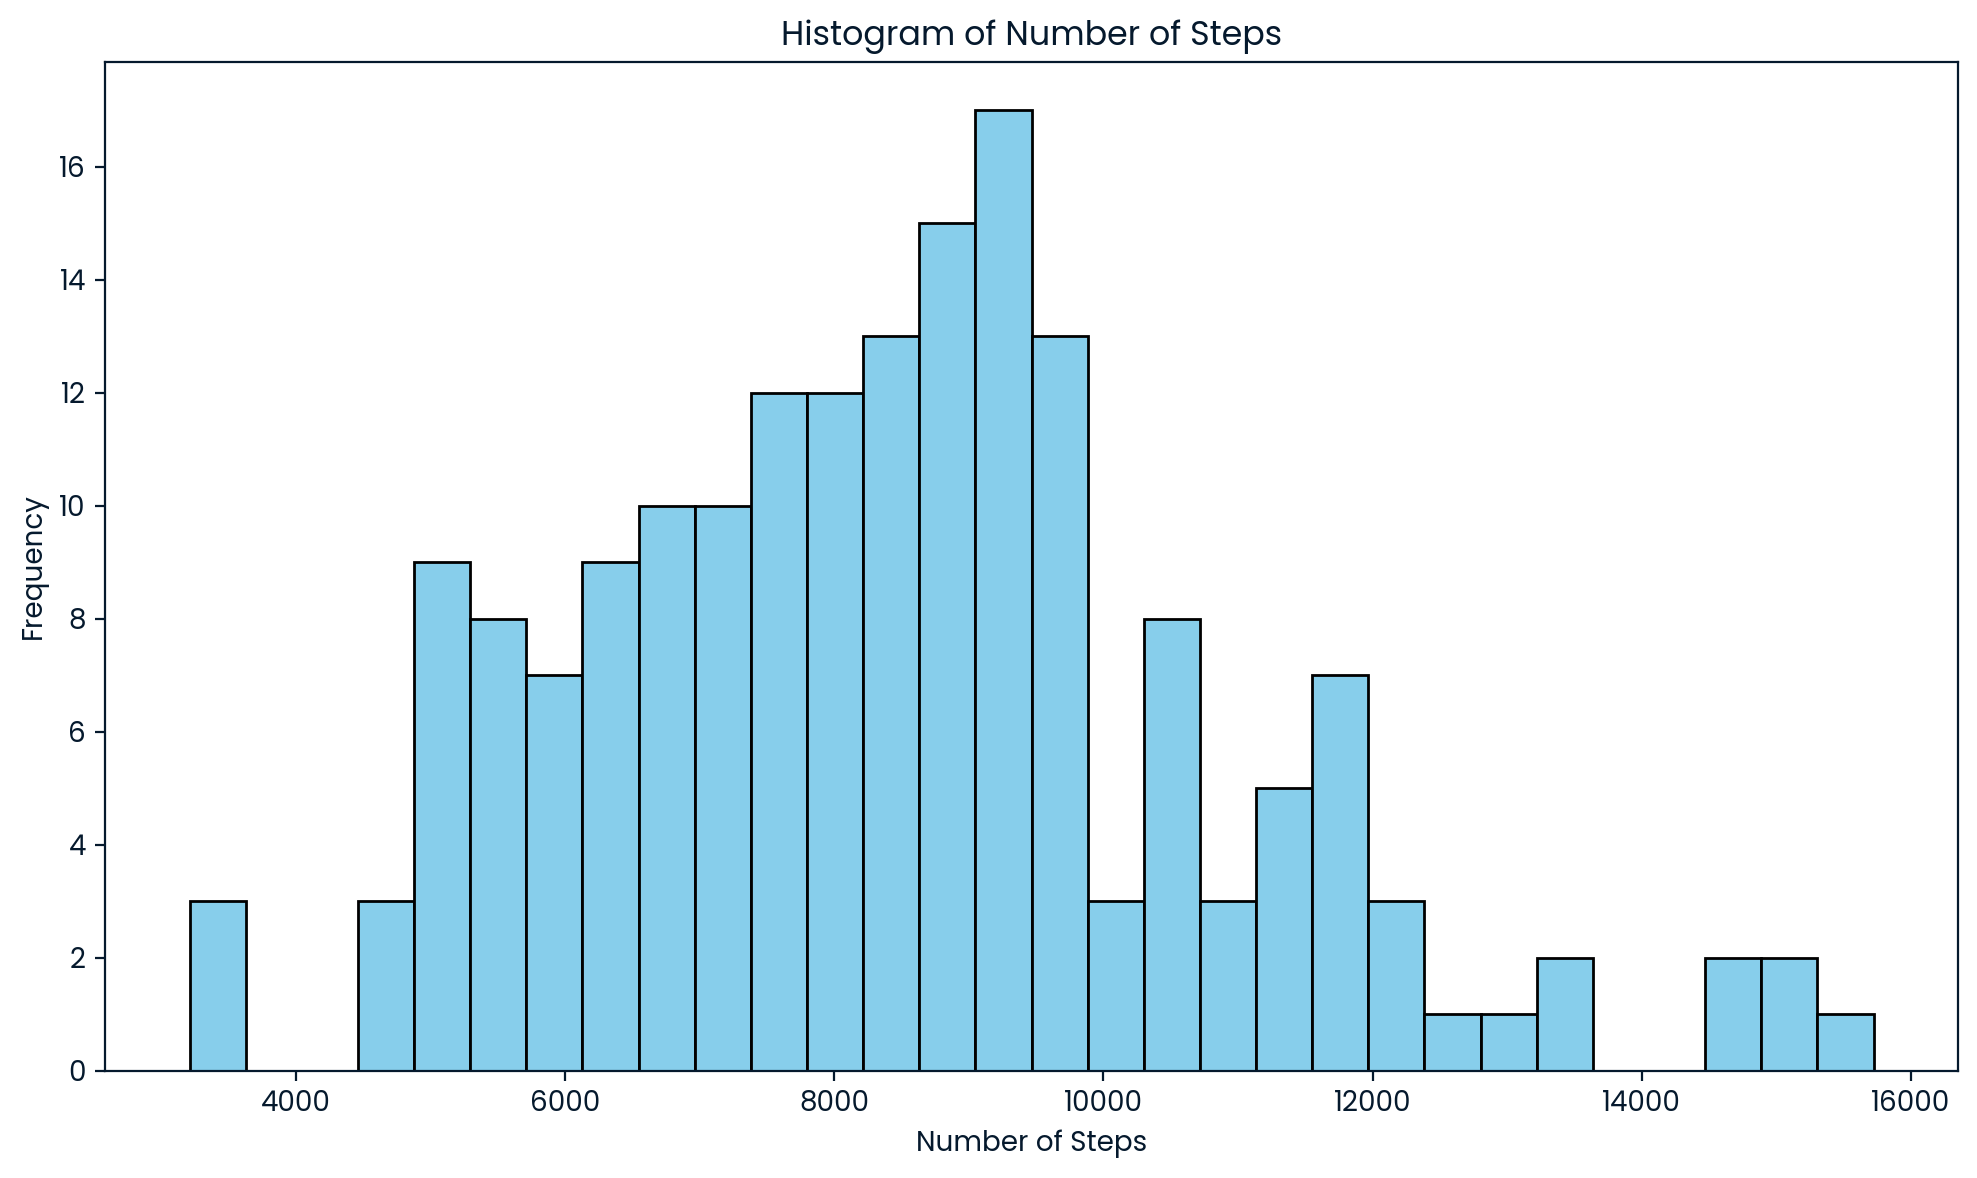

In [74]:

plt.figure(figsize=(10, 6))
plt.hist(df['steps'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Steps')
plt.tight_layout()
plt.show()

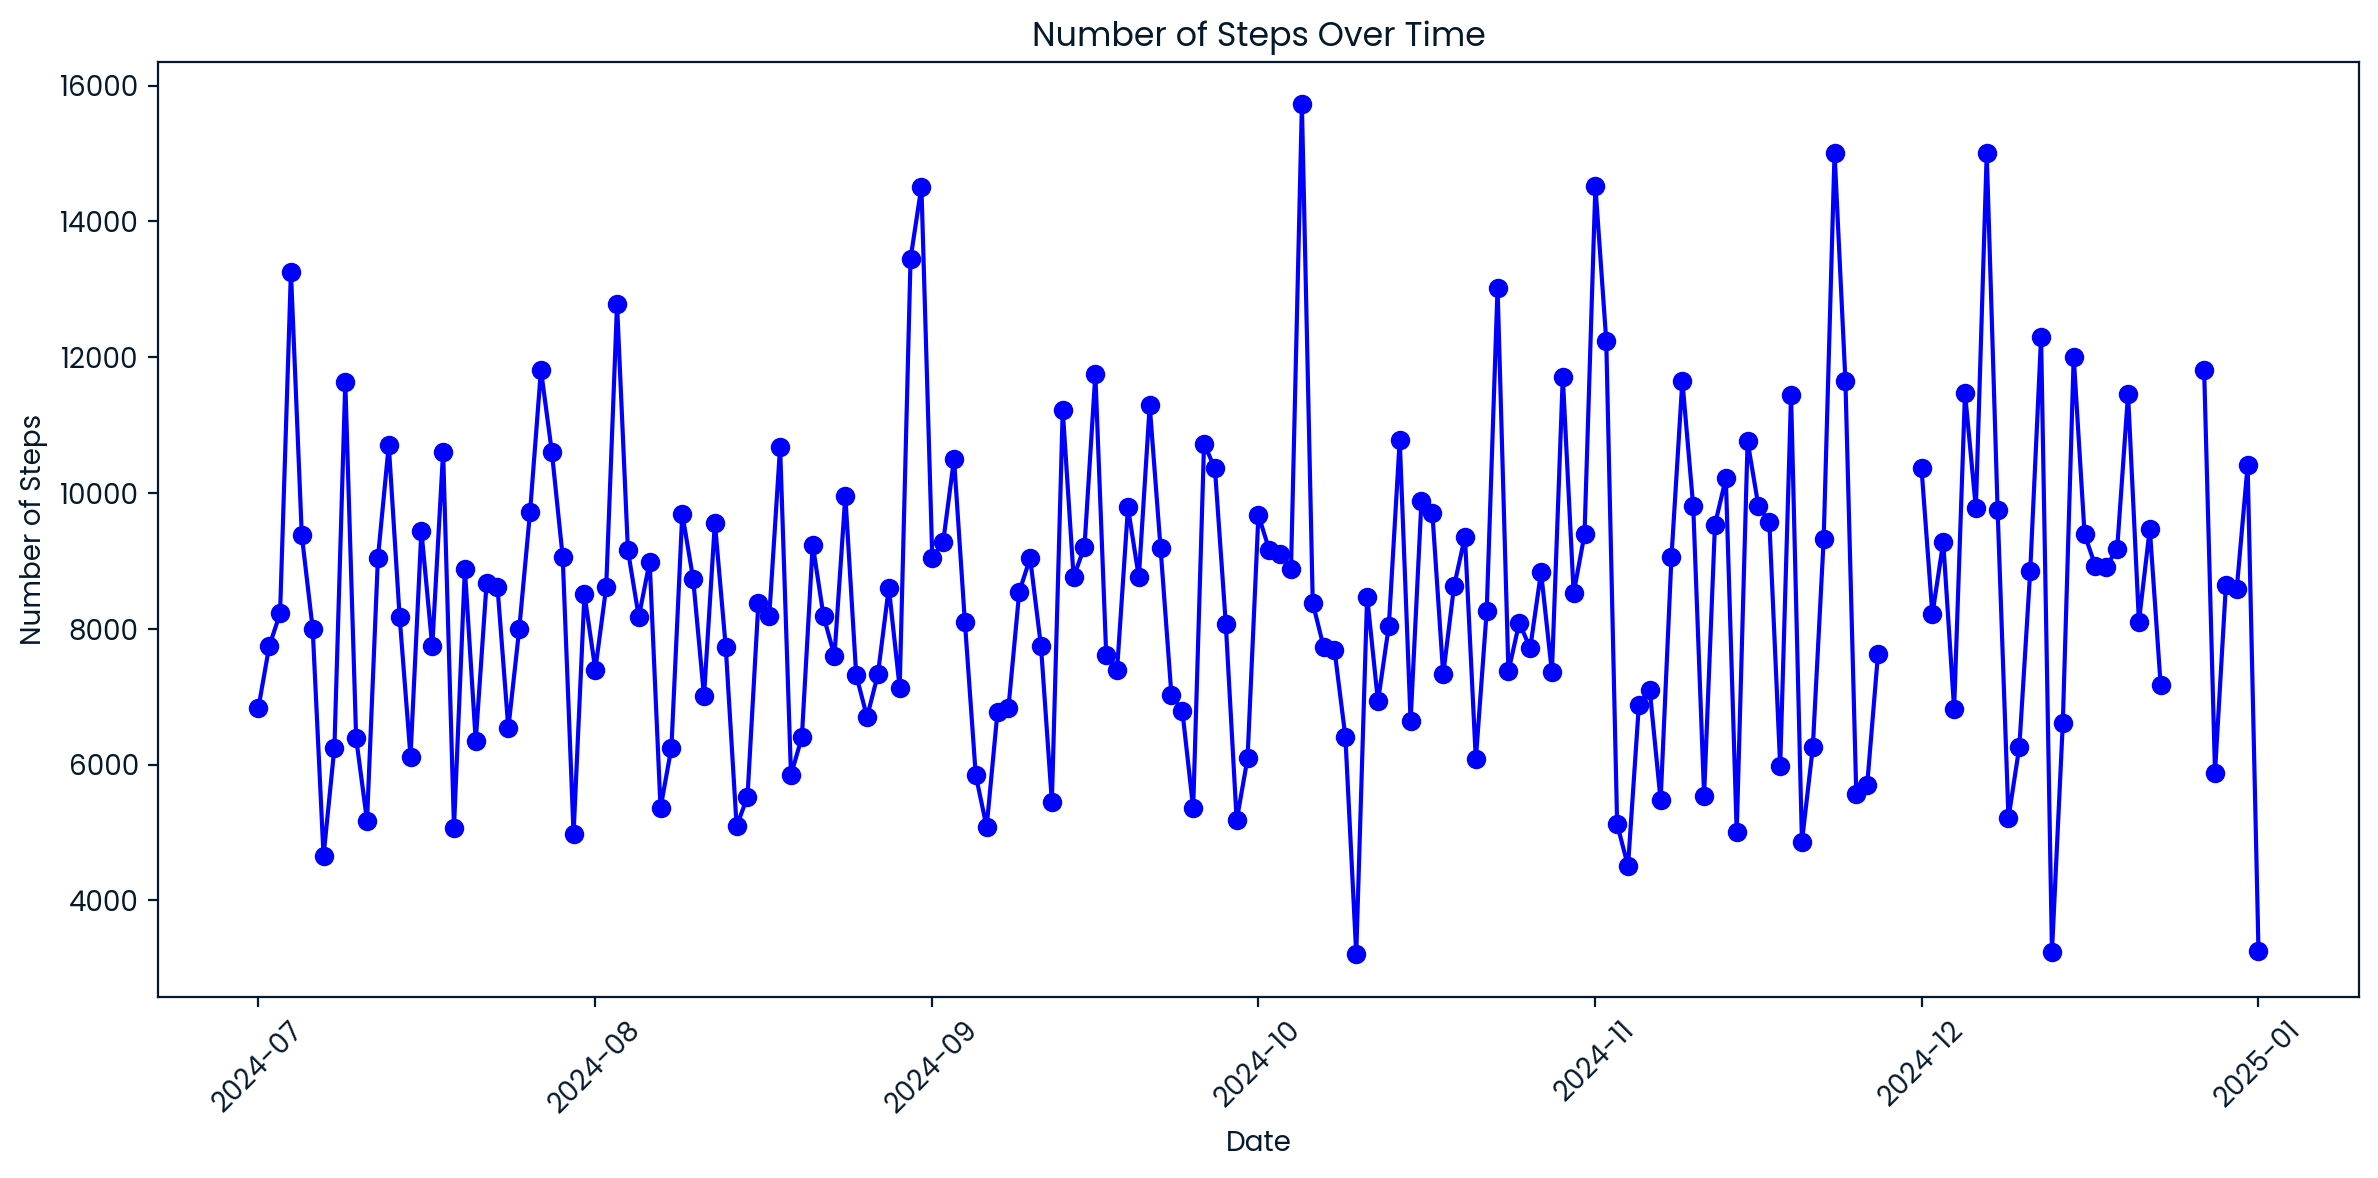

In [75]:
# Create a line chart for the number of steps over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['steps'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.title('Number of Steps Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the line chart
plt.show()

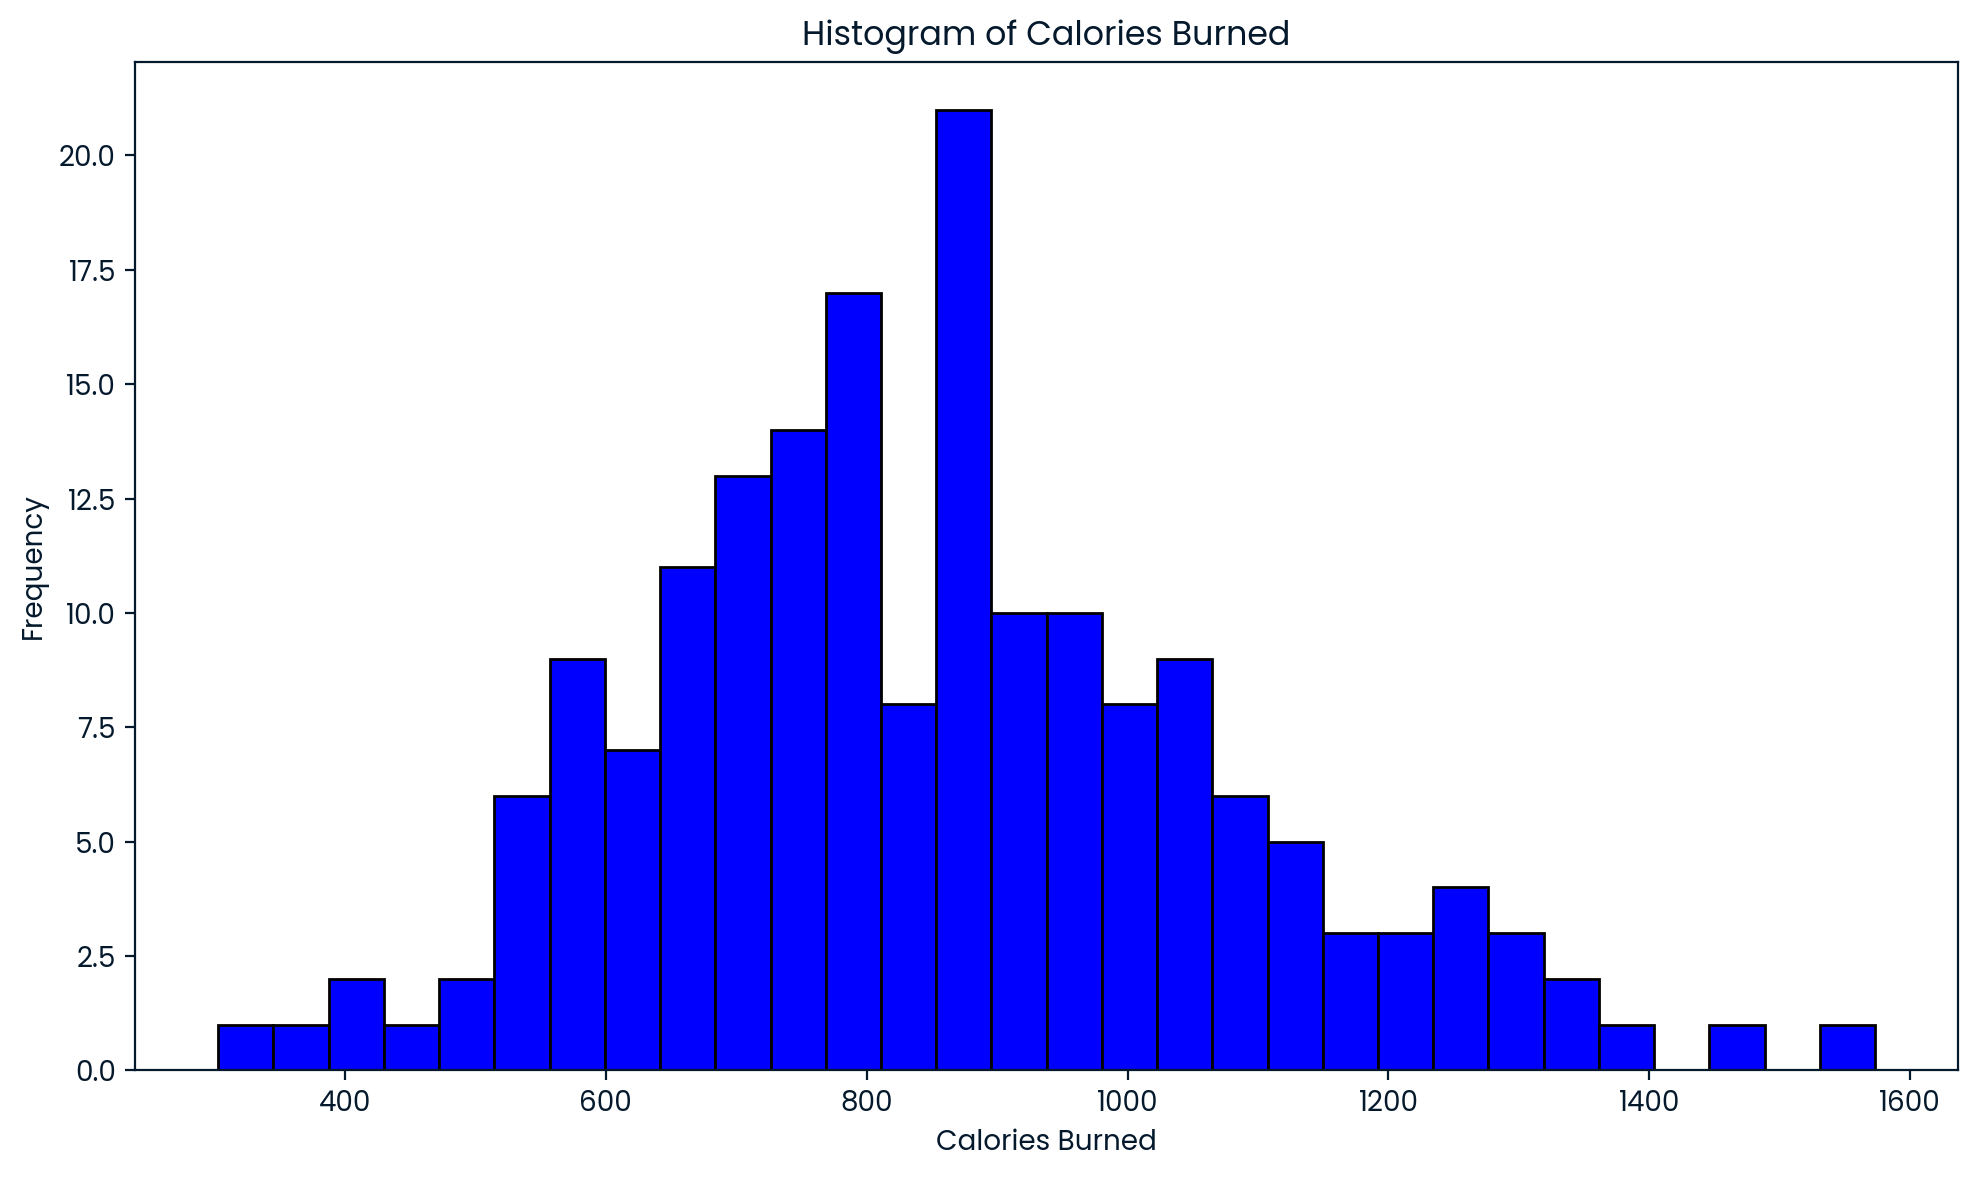

In [76]:
# Visualize the distribution of calories burned
plt.figure(figsize=(10, 6))
plt.hist(df['total_calories_burned'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.title('Histogram of Calories Burned')
plt.tight_layout()
plt.show()

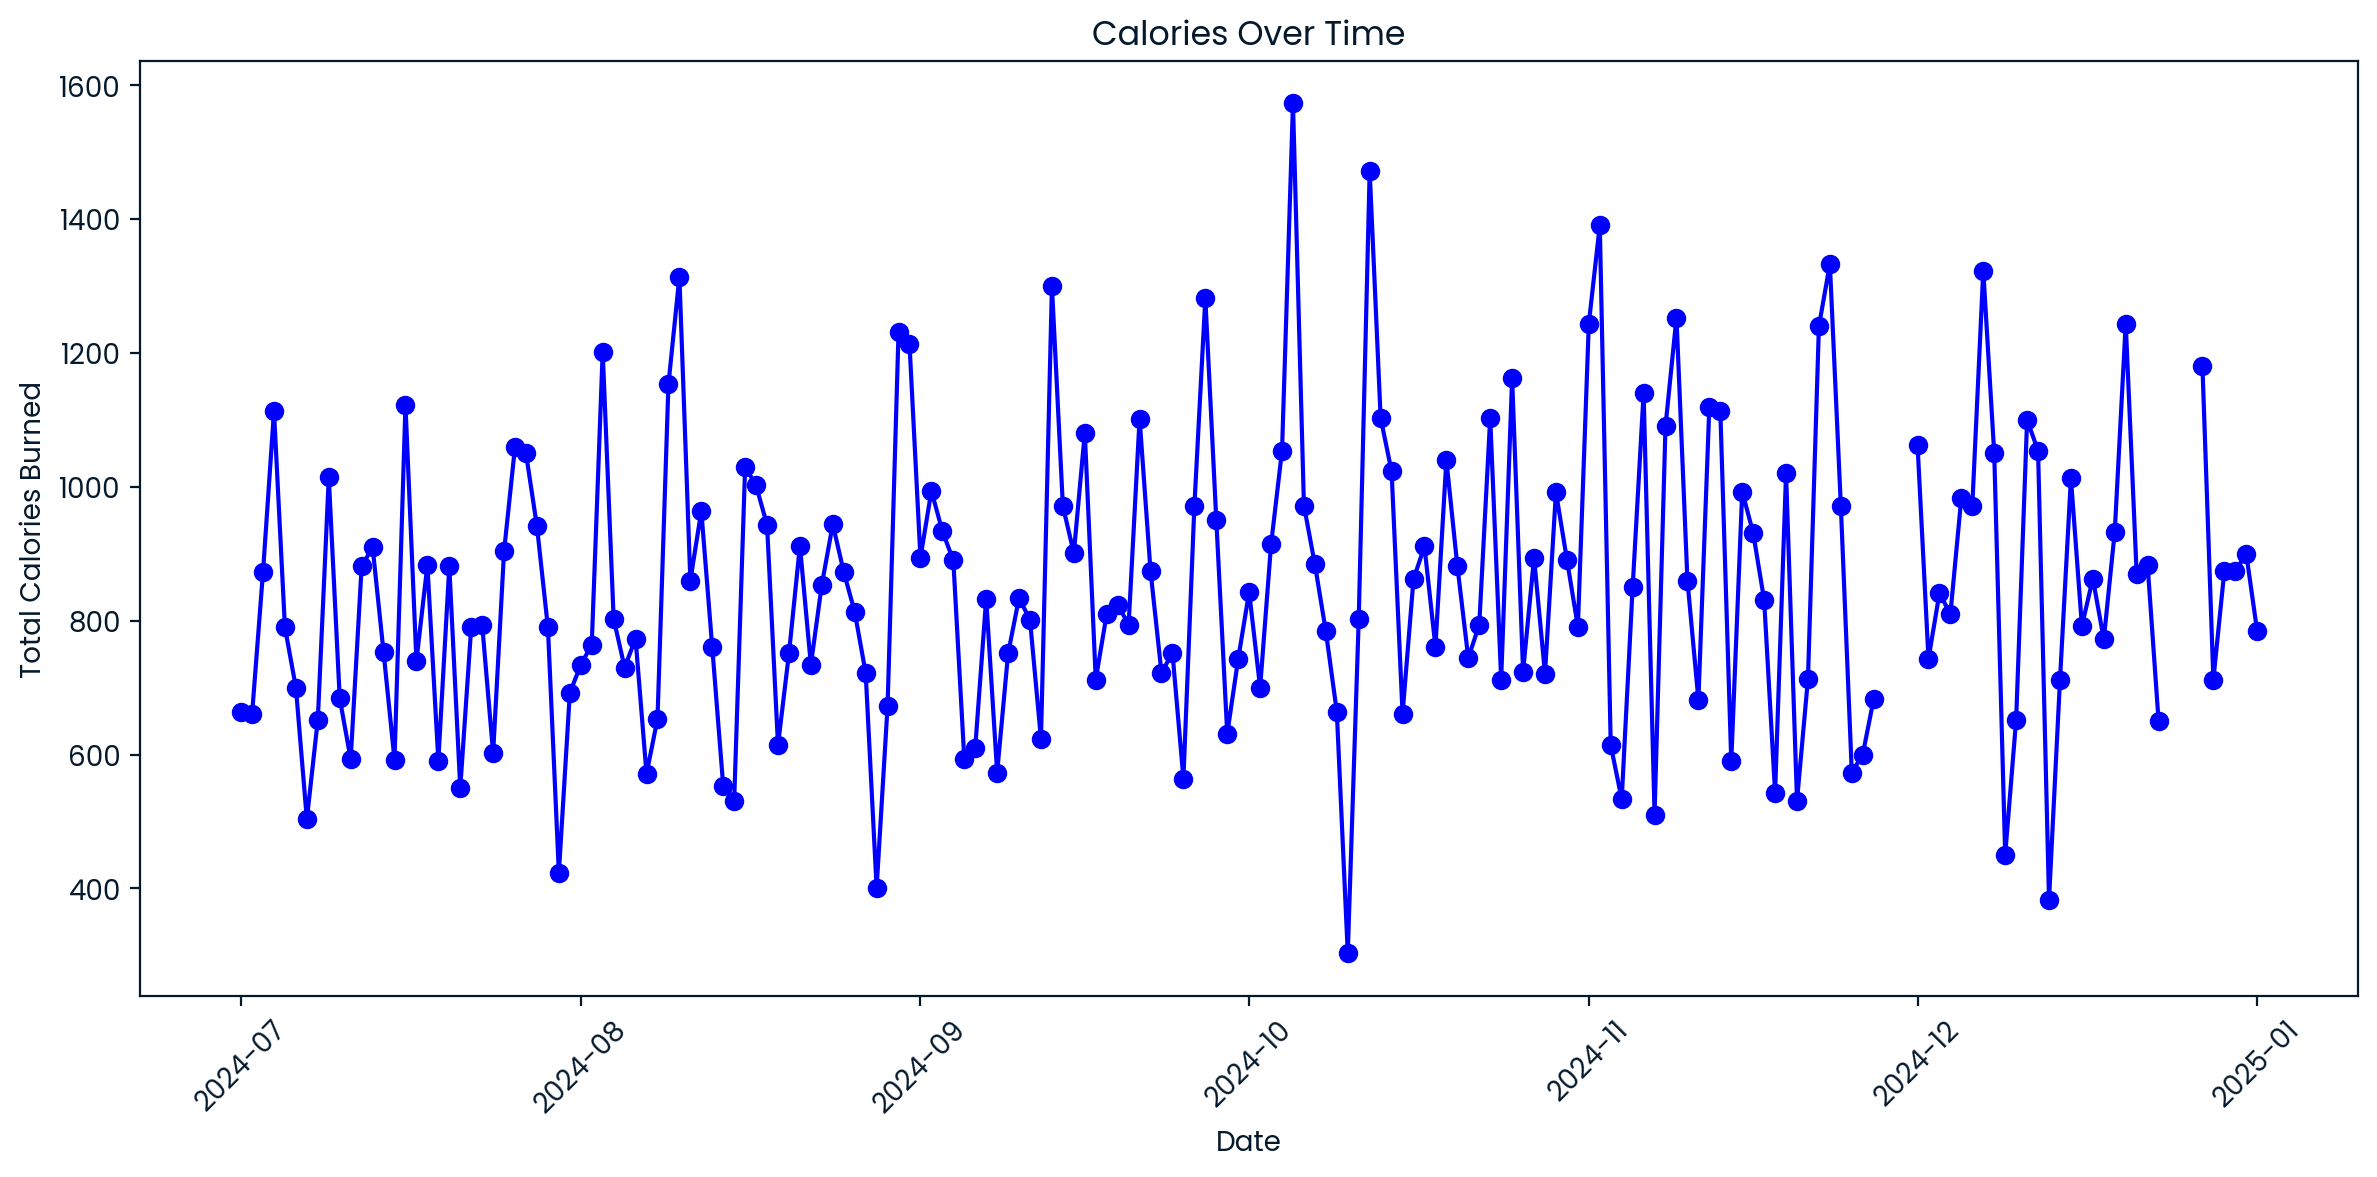

In [77]:
# Create a line chart for the number of calories burned over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['total_calories_burned'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Calories Burned')
plt.title('Calories Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the line chart
plt.show()


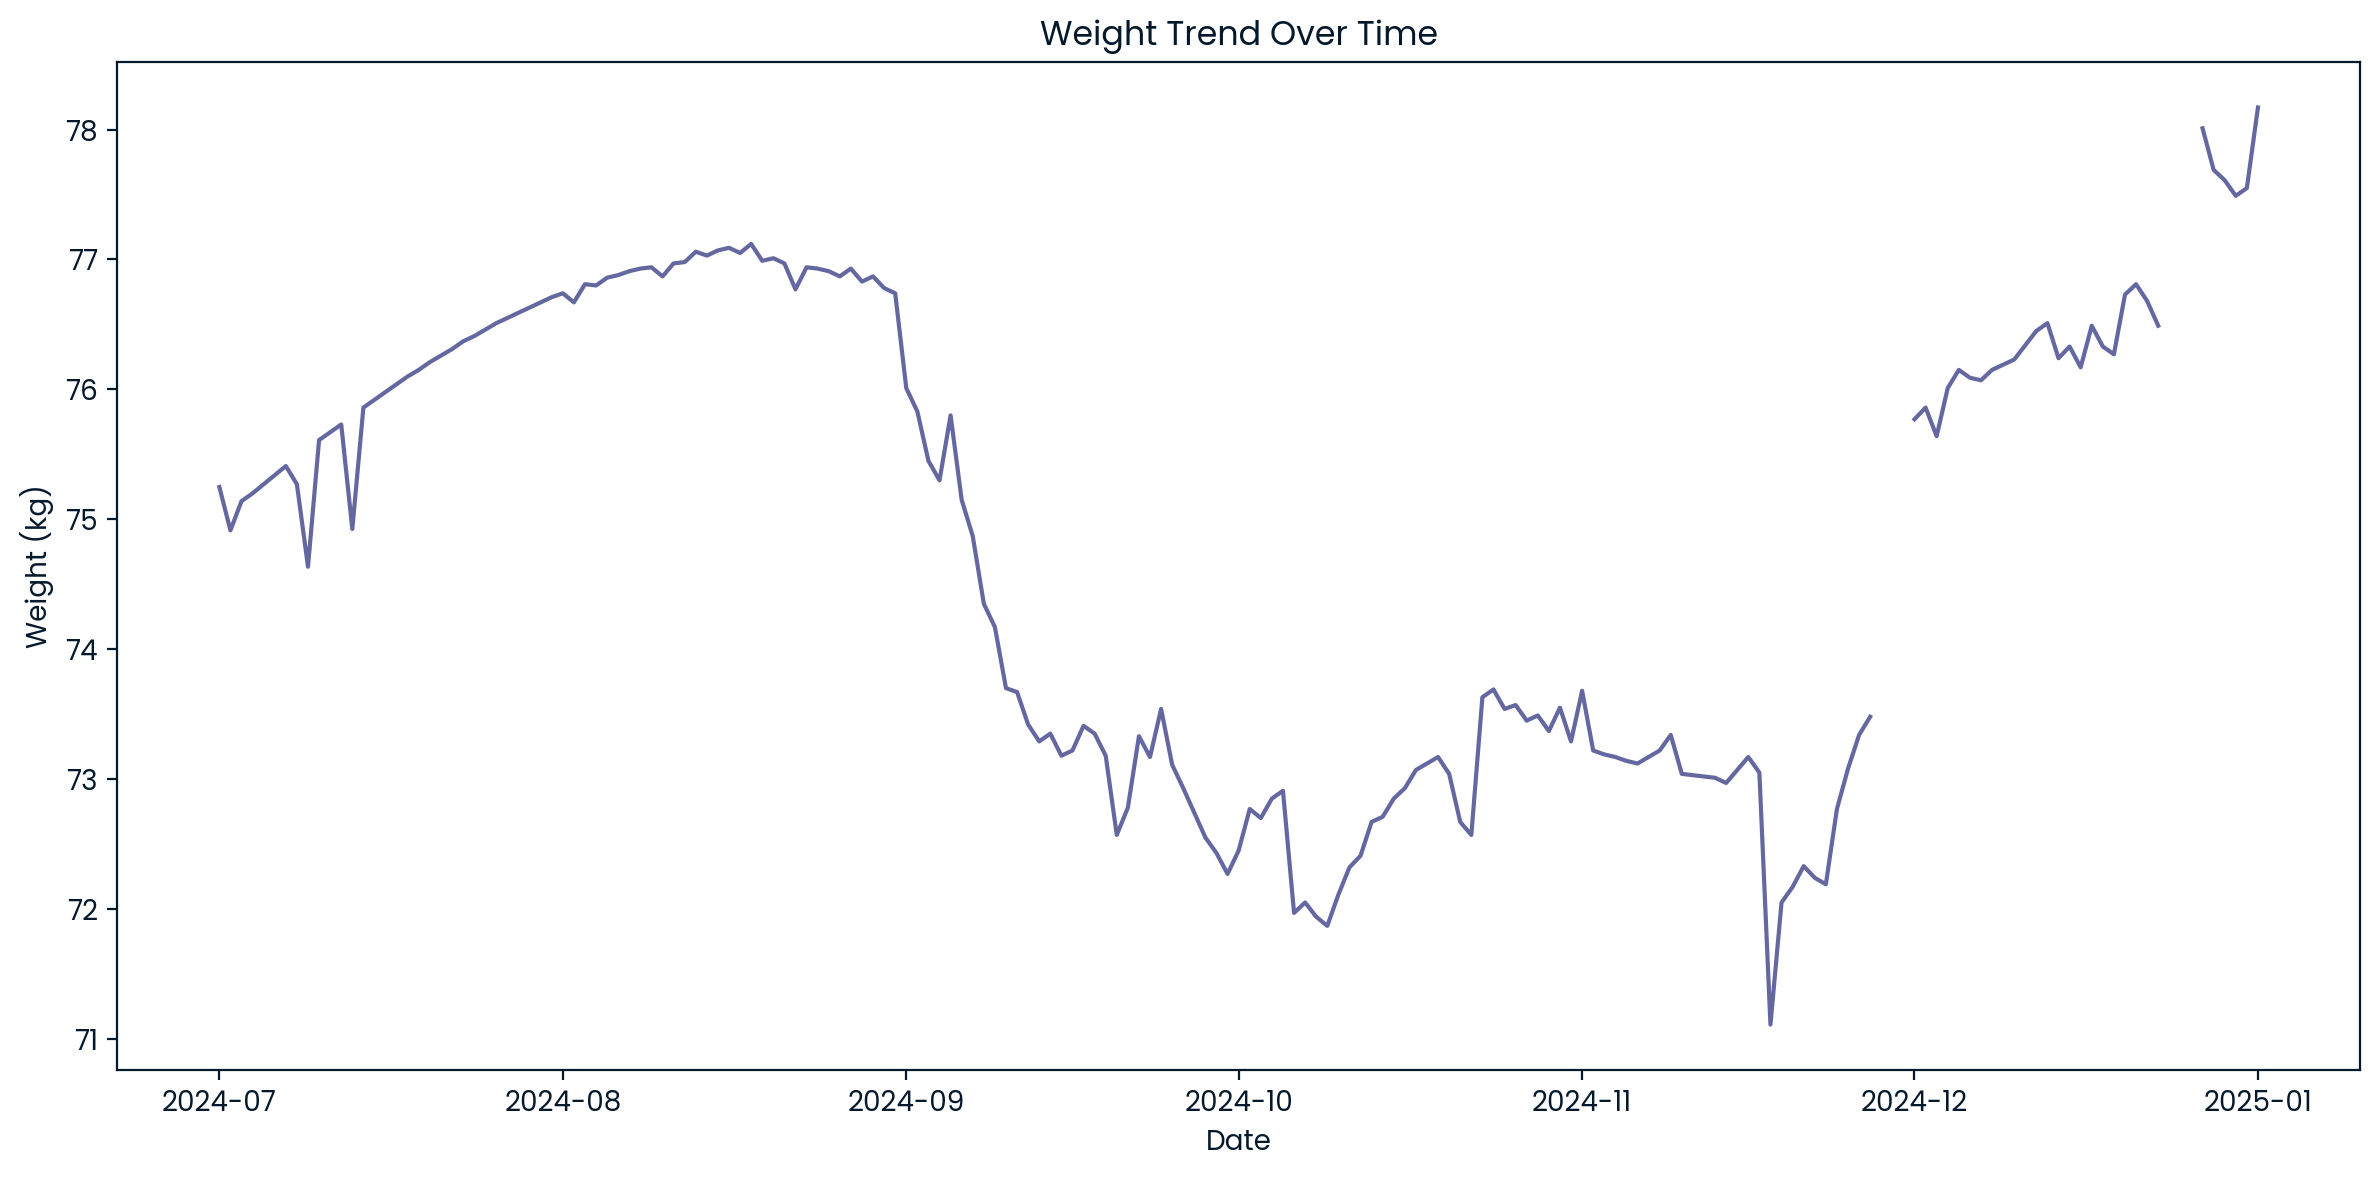

In [78]:
# Visualize weight trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['weight_kg'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.title('Weight Trend Over Time')
plt.xticks()
plt.tight_layout()

plt.show()

## Task 6: Visualizing trends across multiple variables 📊

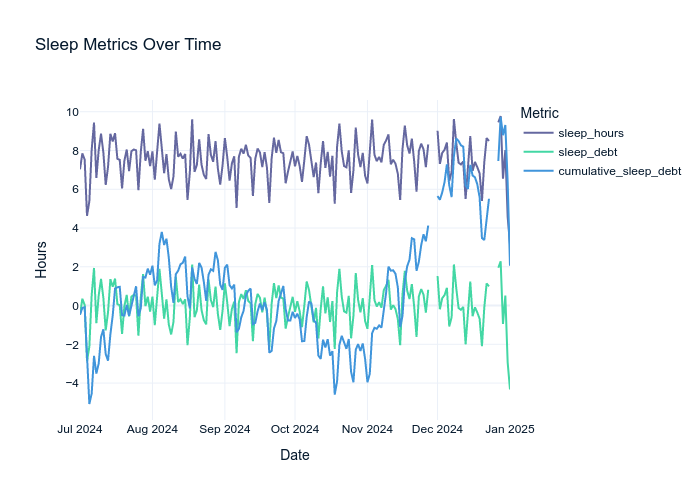

In [79]:
# Create a line chart visualizing sleep metrics over time
sleep_metrics = pe.line(df, 
                        x='date', 
                        y=['sleep_hours', 'sleep_debt', 'cumulative_sleep_debt'], 
                        labels={'value': 'Hours', 'date': 'Date', 'variable': 'Metric'},
                        title='Sleep Metrics Over Time')
sleep_metrics.show(renderer="png")


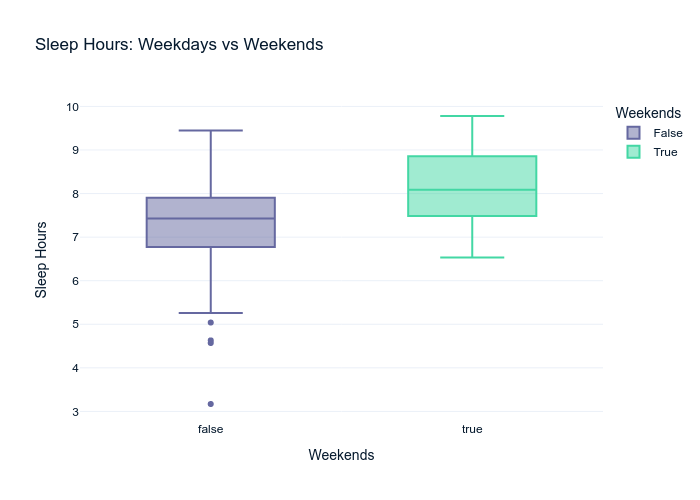

In [80]:
# Create a box plot for sleep hours comparing weekdays and weekends
sleep_wk = pe.box(df, x='is_weekend', 
                  y='sleep_hours', 
                  title='Sleep Hours: Weekdays vs Weekends', 
                  labels={'is_weekend': 'Weekends', 'sleep_hours': 'Sleep Hours', 'variable': 'Metric'},
                  color = 'is_weekend')
sleep_wk.show(renderer="png")

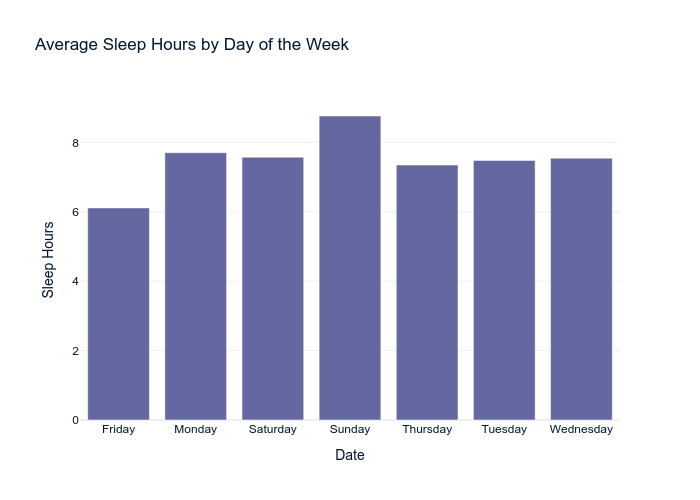

In [81]:
# Visualize average sleep by day of week
average_sleep = df.groupby(df['date'].dt.day_name())['sleep_hours'].mean().reset_index()
av_sleep_wk = pe.bar(average_sleep, 
                     x='date', 
                     y='sleep_hours', 
                     title='Average Sleep Hours by Day of the Week', 
                     labels={'date': 'Date', 'sleep_hours': 'Sleep Hours'})
av_sleep_wk.show(renderer="png")

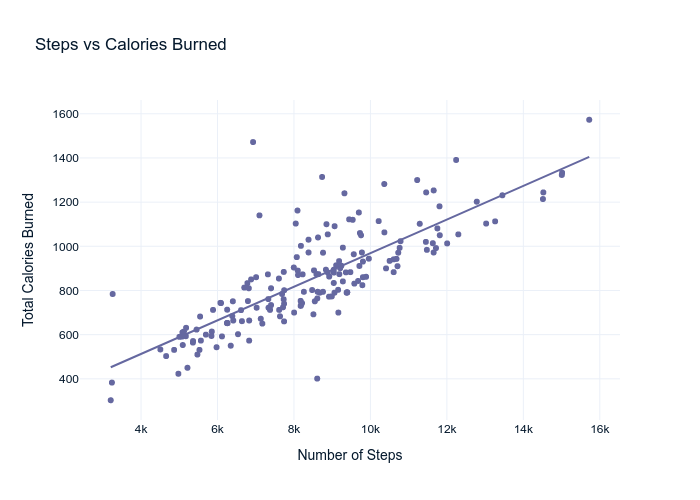

In [82]:
# Visualize number of steps vs. calories burned
stepsvscal = pe.scatter(df, 
                        x='steps', 
                        y='total_calories_burned', 
                        title='Steps vs Calories Burned', 
                        labels={'steps': 'Number of Steps', 'total_calories_burned': 'Total Calories Burned'},
                        trendline="ols")
stepsvscal.show(renderer="png")


In [83]:
# How many different workout types are in the dataset?
unique_workouts = df['workout_type'].nunique()
print(f'Number of different workout types: {unique_workouts}')


Number of different workout types: 5


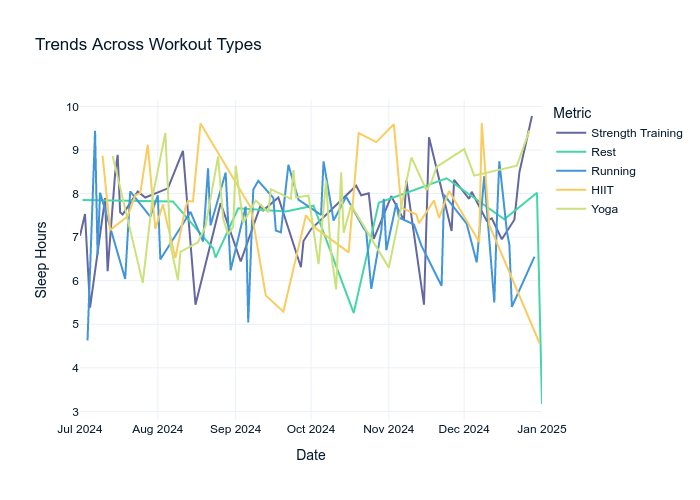

In [84]:
# Visualize trends across workout types
workout_viz = pe.line(df, 
                      x='date', 
                      y='sleep_hours', 
                      color='workout_type', 
                      title='Trends Across Workout Types', 
                      labels={'date': 'Date', 'sleep_hours': 'Sleep Hours', 'workout_type': 'Metric'})
workout_viz.show(renderer="png")

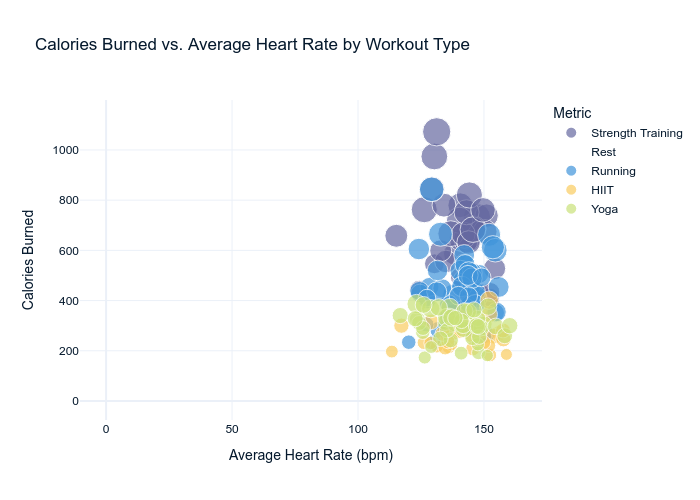

In [85]:
workout_plot = pe.scatter(
    df,
    x='workout_avg_hr',
    y='workout_calories',
    color='workout_type',
    size='workout_duration_minutes',
    title='Calories Burned vs. Average Heart Rate by Workout Type',
    labels={'workout_avg_hr': 'Average Heart Rate (bpm)', 'workout_calories': 'Calories Burned', 'workout_type': 'Metric'},
    hover_data=['fat_burn_minutes']
)
workout_plot.show(renderer="png")
